We plot the EOFs of vertical mass flux (given by $\rho w = -\omega/g$). 

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
from src.configs import ProjectConfigs, gSAMConfigs

In [28]:
region_name = 'northwest_tropical_pacific'
era5_eof_file = f'{ProjectConfigs().project_root_dir}/data/era5.eofs.northwest_tropical_pacific.massflux.2deg.nc'
gsam_eof_file = f'{ProjectConfigs().project_root_dir}/data/gsam_era5_levels.eofs.northwest_tropical_pacific.massflux.50pix.nc'
assert(os.path.isfile(era5_eof_file))

In [32]:
era5_eofs = xr.open_dataarray(era5_eof_file)
gsam_eofs = xr.open_dataarray(gsam_eof_file)

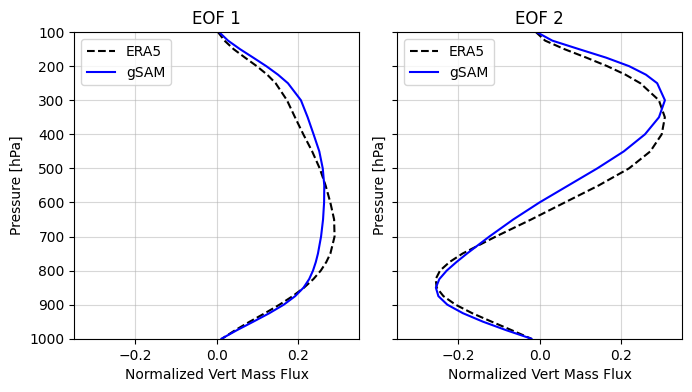

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(7,4), sharey=True)
era5_eofs.sel(mode=1).plot(ax=axs[0], y='level', linestyle='dashed', color='k', label='ERA5')
era5_eofs.sel(mode=2).plot(ax=axs[1], y='level', linestyle='dashed', color='k', label='ERA5')
gsam_eofs.sel(mode=1).plot(ax=axs[0], y='level', color='b', label='gSAM')
gsam_eofs.sel(mode=2).plot(ax=axs[1], y='level', color='b', label='gSAM')
axs[0].set_title('EOF 1')
axs[1].set_title('EOF 2')
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(1000, 100)
    ax.set_ylabel('Pressure [hPa]')
    ax.set_xlabel('Normalized Vert Mass Flux')
    ax.set_xlim(-0.35, 0.35)
    ax.grid(alpha=0.5)
    ax.legend()
fig.tight_layout(pad=1)
plt.savefig(f'{ProjectConfigs().project_root_dir}/figures/vertical_massflux_eofs.pdf', format='pdf');